# Explore here

In [202]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Problema: predecir con ciertas caracteristicas medicas de un paciente si este tiene diabetes. (Clasificacion)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Todas nuestras variables son numericas, y no se encuentran NaNs en el Dataframe

In [205]:
# Verificacion de filas duplicadas

df.duplicated().sum()

np.int64(0)

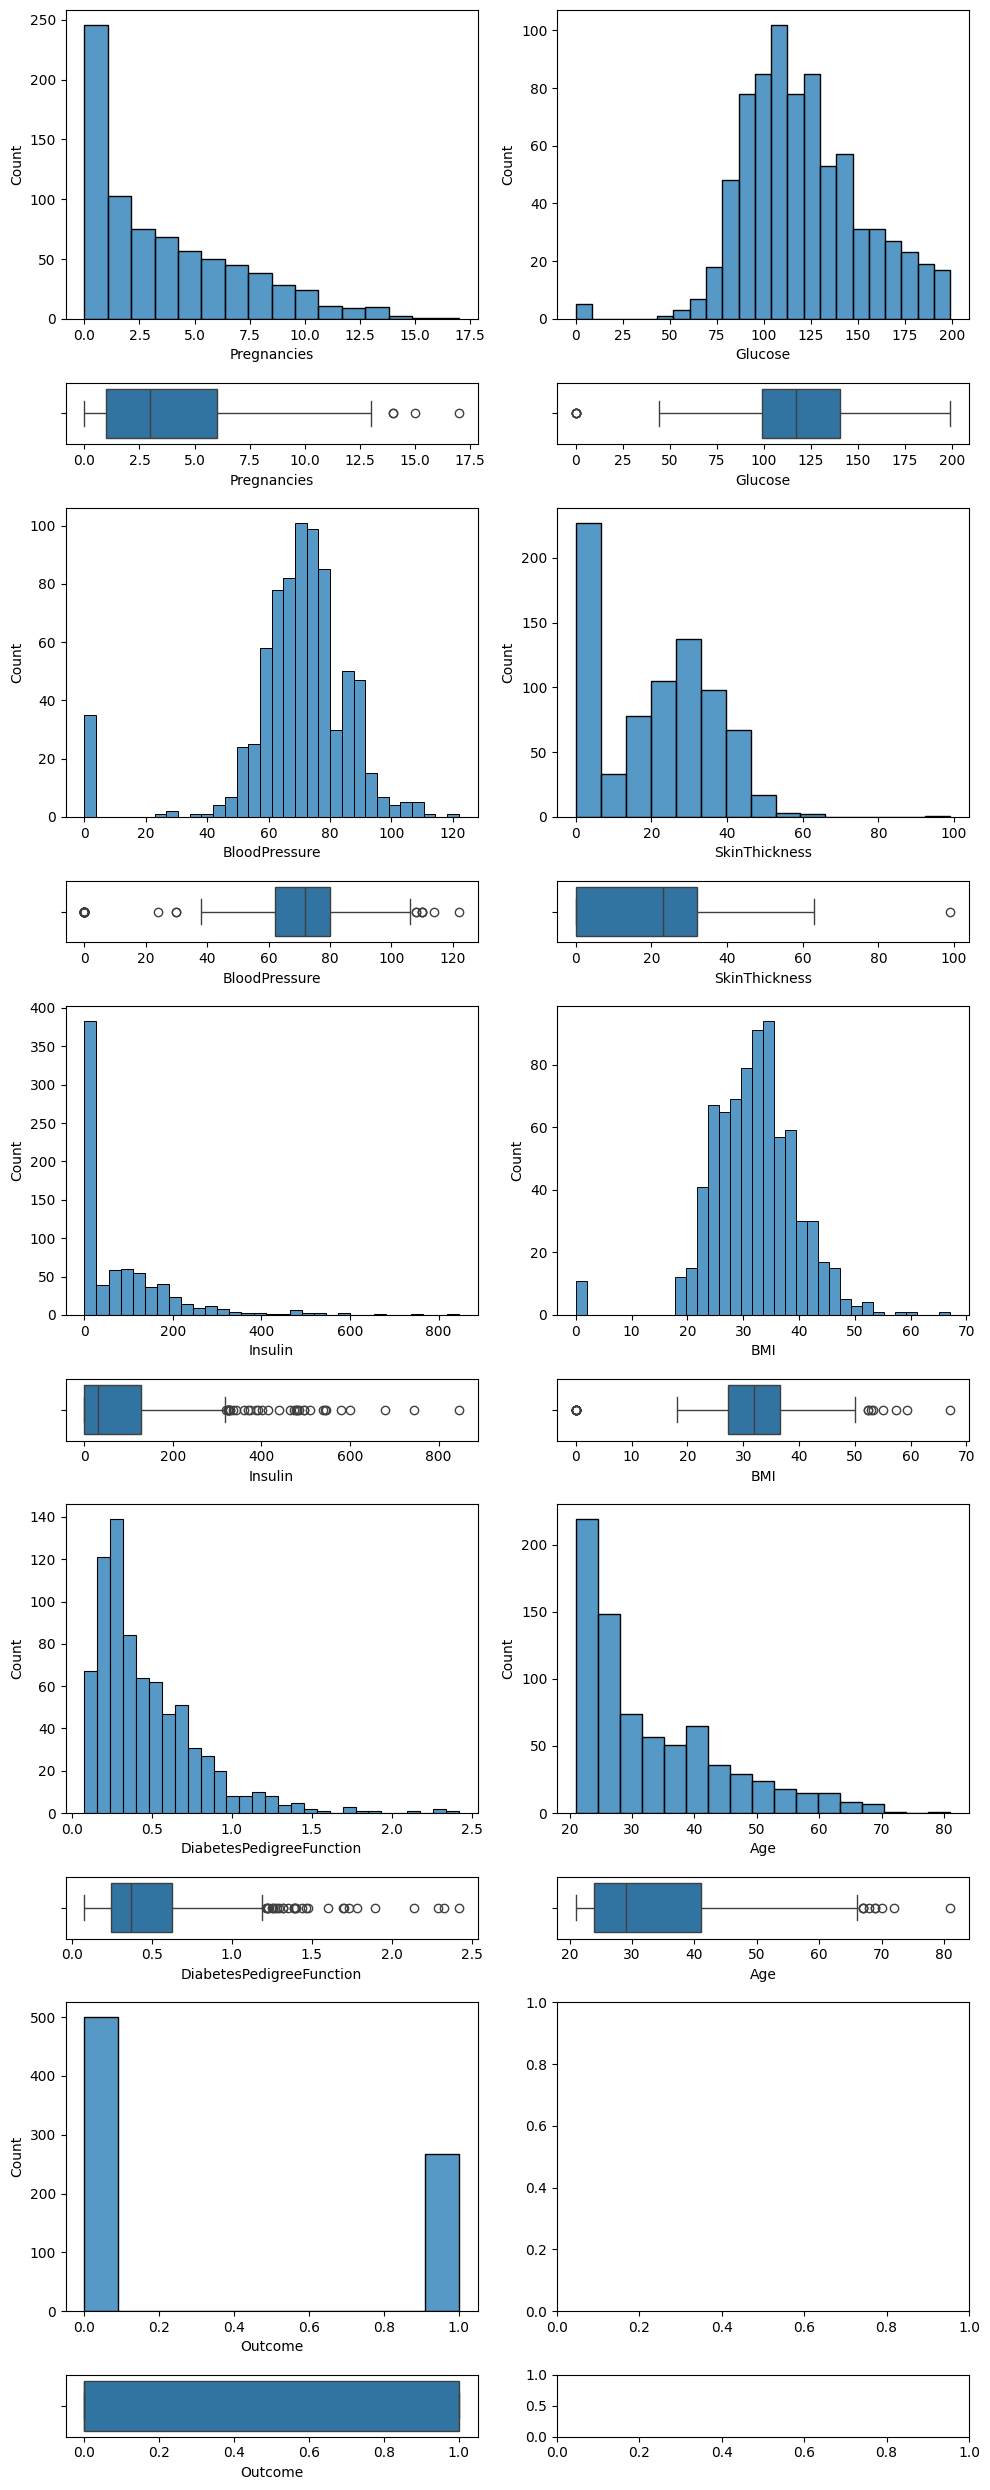

In [206]:
# Analisis Univariante 
    # Numerico

def plot_numeric_features(df):
    # Verificar que el DataFrame contiene solo variables numéricas
    if not all(df.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x))):
        raise ValueError("El DataFrame debe contener solo variables numéricas.")

    # Determinar el número de variables numéricas
    num_vars = df.select_dtypes(include='number').columns
    num_vars_count = len(num_vars)

    # Calcular el número de filas necesarias para el subplot
    n_rows = (num_vars_count + 1) // 2  # Redondear hacia arriba para obtener suficientes filas

    # Crear la figura y los ejes
    fig, axis = plt.subplots(n_rows * 2, 2, figsize=(10, n_rows * 5), gridspec_kw={"height_ratios": [5, 1] * n_rows})

    # Iterar sobre cada variable numérica y crear gráficos
    for i, var in enumerate(num_vars):
        row = i // 2 * 2  # Fila del histograma
        col = i % 2  # Columna del histograma
        
        # Graficar histogramas
        sns.histplot(ax=axis[row, col], data=df, x=var)
        # Graficar boxplots
        sns.boxplot(ax=axis[row + 1, col], data=df, x=var)

    # Ajustar el layout para evitar solapamiento
    plt.tight_layout()
    plt.show()

plot_numeric_features(df)

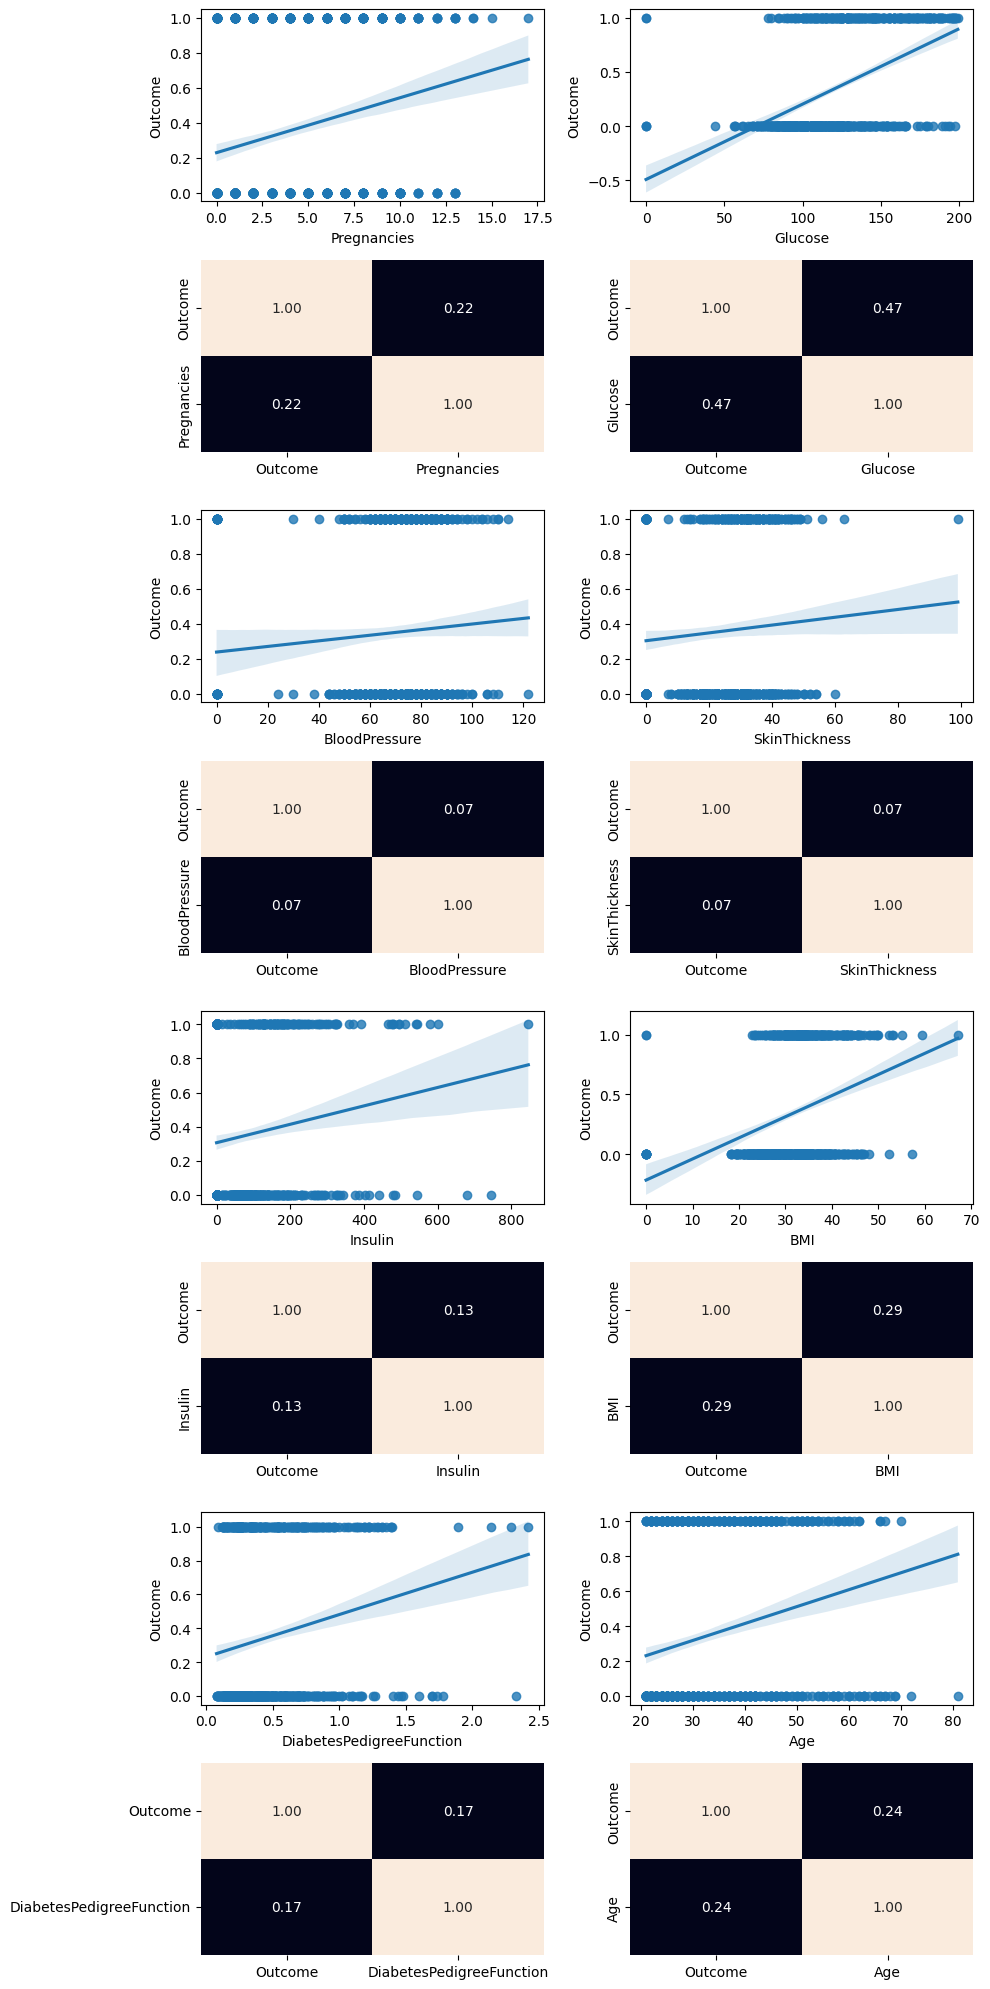

In [207]:
# Analisis Multivariante
    # Numerico - Numerico

def plot_numerical_vs_target(df, target_var):
    # Verificar que el DataFrame contiene solo variables numéricas
    if not all(df.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x))):
        raise ValueError("El DataFrame debe contener solo variables numéricas.")
    
    # Verificar que la variable objetivo está en el DataFrame
    if target_var not in df.columns:
        raise ValueError(f"La variable objetivo '{target_var}' no se encuentra en el DataFrame.")

    # Obtener las variables numéricas excepto la variable objetivo
    num_vars = df.select_dtypes(include='number').columns
    num_vars = num_vars[num_vars != target_var]  # Excluir la variable objetivo

    # Calcular el número de filas necesarias para el subplot
    n_vars = len(num_vars)
    n_rows = (n_vars + 1) // 2  # Redondear hacia arriba para obtener suficientes filas

    # Crear la figura y los ejes
    fig, axis = plt.subplots(n_rows * 2, 2, figsize=(10, n_rows * 5))

    # Iterar sobre cada variable numérica y crear gráficos
    for i, var in enumerate(num_vars):
        row = i // 2 * 2  # Fila para regplot
        col = i % 2  # Columna para regplot
        
        # Graficar regplots
        sns.regplot(ax=axis[row, col], data=df, x=var, y=target_var)
        # Graficar heatmap
        sns.heatmap(df[[target_var, var]].corr(), annot=True, fmt='.2f', ax=axis[row + 1, col], cbar=False)

    # Eliminar ejes vacíos si hay un número impar de variables
    if n_vars % 2 != 0:
        fig.delaxes(axis[n_rows * 2 - 1, 1])

    # Ajustar el layout para evitar solapamiento
    plt.tight_layout()
    plt.show()


plot_numerical_vs_target(df, 'Outcome')

La variable Glucosa, es la que tiene una relacion mas fuerte con la variable objetivo, lo cual tiene todo el sentido. Ademas las variables Blood Pressure y Skin Thickness son las que menos relacion tienen con el objetivo por si solas.

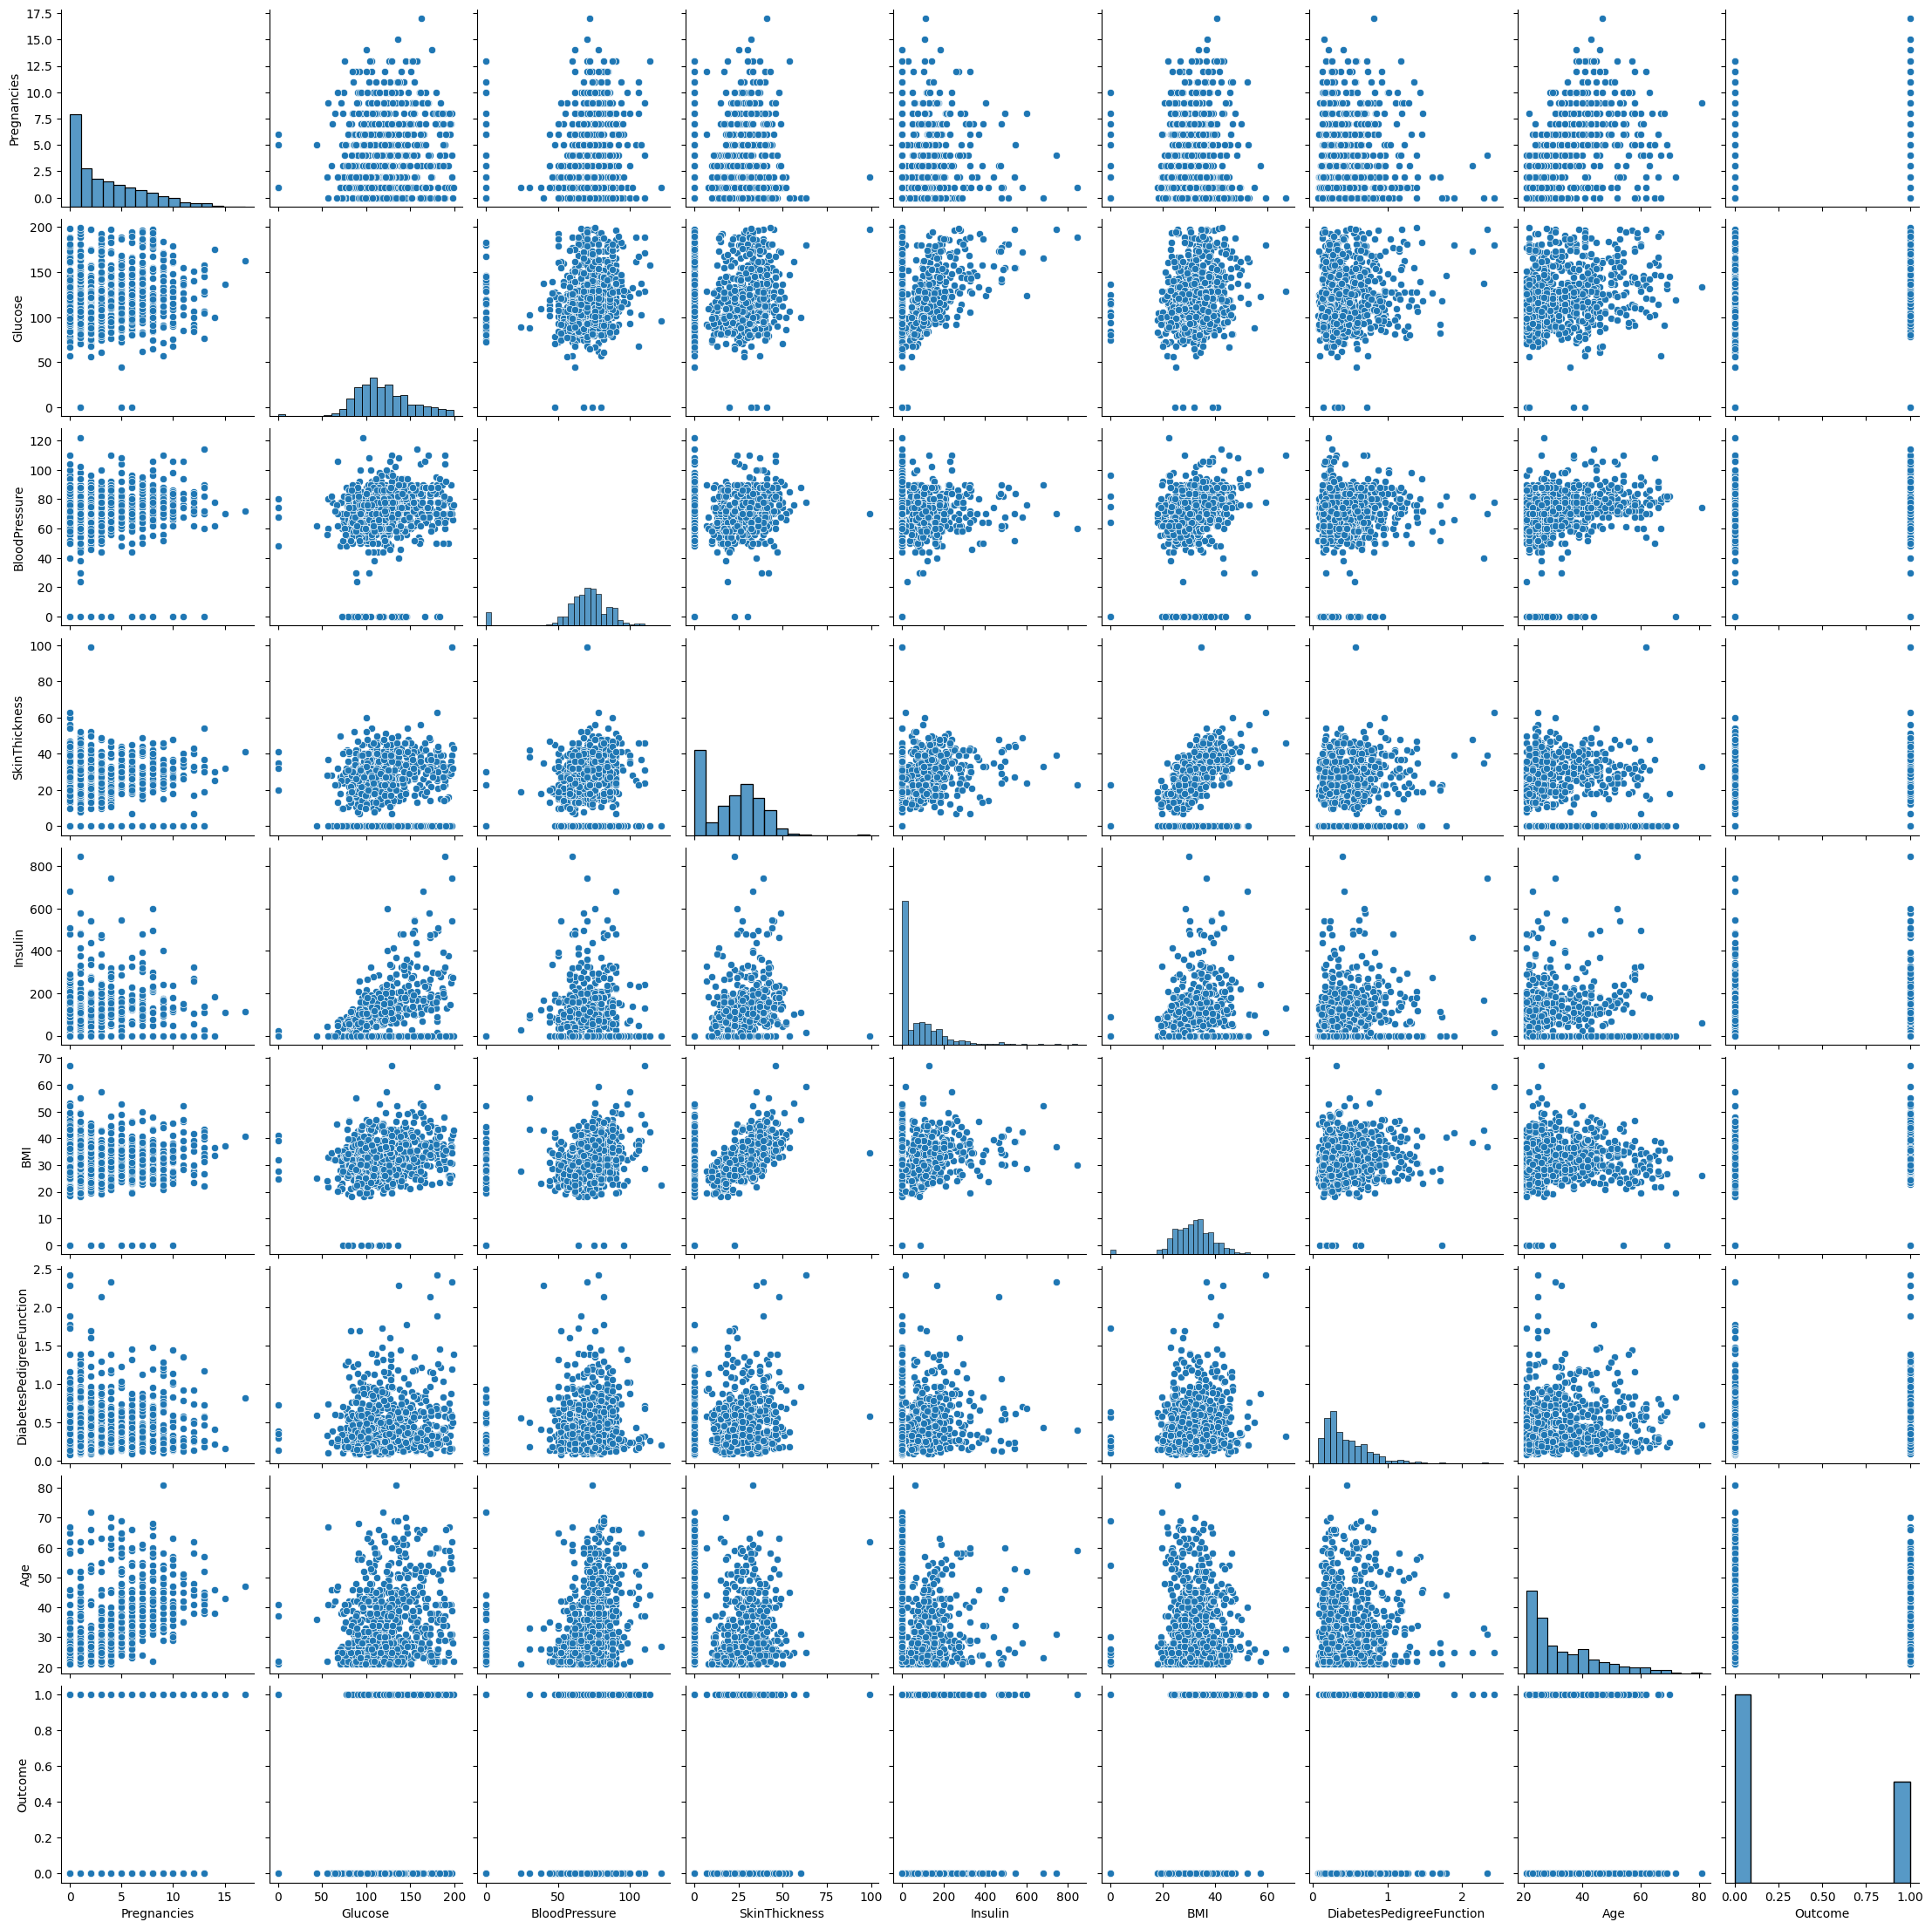

In [208]:
# Analisis de correlaciones entre todas las variables

sns.pairplot(data=df)

<Axes: >

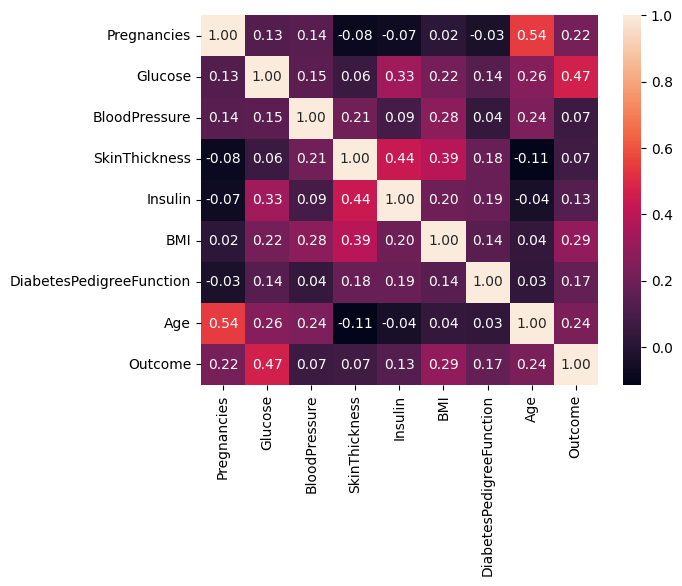

In [209]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")

In [210]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


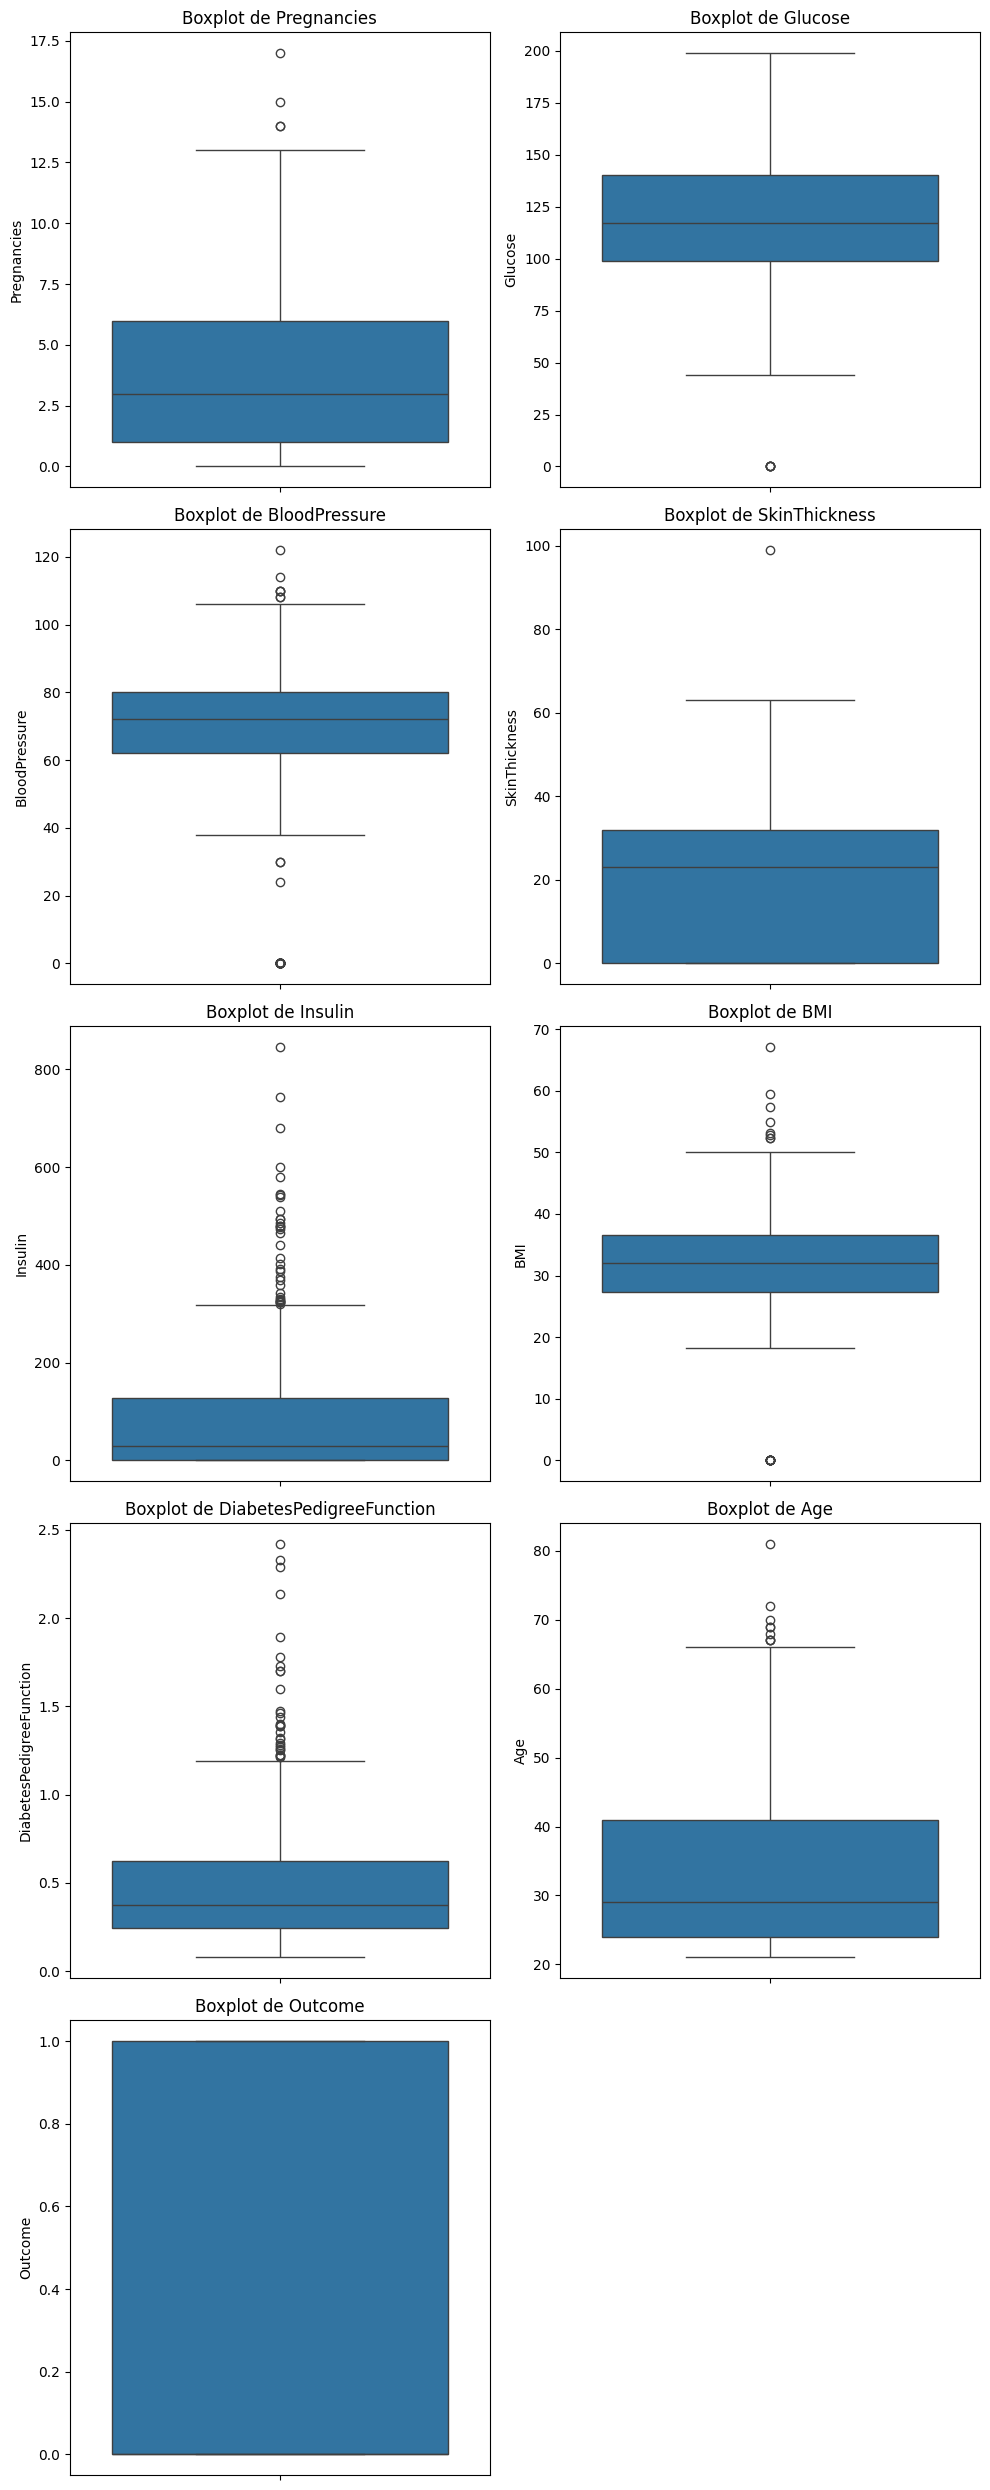

In [211]:
# Analisis de Outliers

def boxplot_columns(df):
    # Filtrar solo las columnas numéricas del DataFrame
    num_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

    # Determinar el número de filas y columnas para los subgráficos
    rows = (len(num_columns) // 2) + (1 if len(num_columns) % 2 != 0 else 0)  # Para asegurar un número adecuado de filas
    
    # Crear los subgráficos
    fig, axes = plt.subplots(rows, 2, figsize=(10, 5 * rows))
    
    # Aplanar la matriz de ejes para facilitar la iteración
    axes = axes.flatten()
    
    # Crear un boxplot para cada columna numérica
    for i, col in enumerate(num_columns):
        sns.boxplot(ax=axes[i], data=df, y=col)
        axes[i].set_title(f'Boxplot de {col}')
    
    # Eliminar ejes extra si hay menos columnas que subgráficos
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

boxplot_columns(df)

In [212]:
def analisis_ric(columna,df):
    estadisticas = df[columna].describe()
    ric = estadisticas['75%'] - estadisticas['25%']
    lim_sup = estadisticas['75%'] + 1.5*ric
    lim_inf = estadisticas['25%'] - 1.5*ric
    print(f'Rango Intercuratílico: {ric}')
    print(f'Límite superior: {lim_sup} \nLímite inferior: {lim_inf}')

Rango Intercuratílico: 5.0
Límite superior: 13.5 
Límite inferior: -6.5


Pregnancies                 4
Glucose                     4
BloodPressure               4
SkinThickness               4
Insulin                     4
BMI                         4
DiabetesPedigreeFunction    4
Age                         4
Outcome                     4
dtype: int64


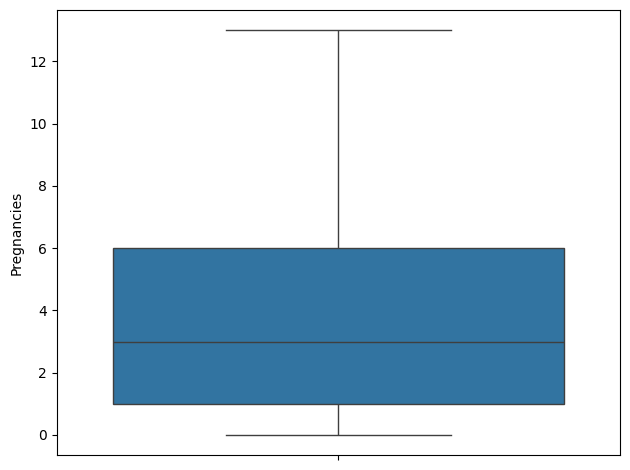

In [213]:
# Analisis de Outliers

analisis_ric('Pregnancies',df)

print('\n')
print(df[df['Pregnancies']>=14].count())

df = df[df['Pregnancies']<14]

sns.boxplot(data=df,y='Pregnancies')
plt.tight_layout()
plt.show()


Rango Intercuratílico: 41.0
Límite superior: 201.5 
Límite inferior: 37.5


Pregnancies                 5
Glucose                     5
BloodPressure               5
SkinThickness               5
Insulin                     5
BMI                         5
DiabetesPedigreeFunction    5
Age                         5
Outcome                     5
dtype: int64


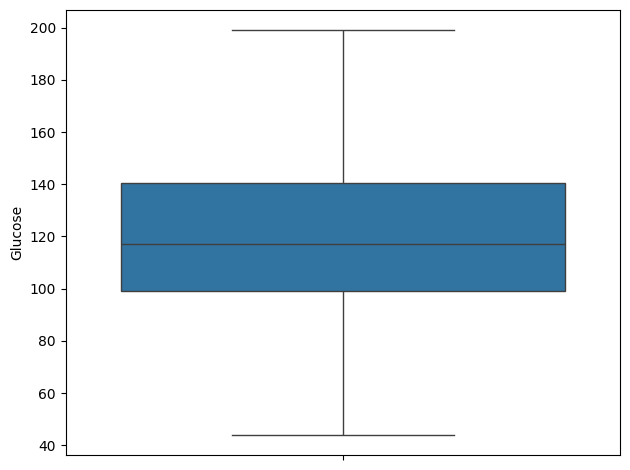

In [214]:
analisis_ric('Glucose',df)
print('\n')

print(df[df['Glucose']<=0].count())

df = df[df['Glucose']>0]

sns.boxplot(data=df,y='Glucose')
plt.tight_layout()
plt.show()

Rango Intercuratílico: 18.0
Límite superior: 107.0 
Límite inferior: 35.0


Pregnancies                 7
Glucose                     7
BloodPressure               7
SkinThickness               7
Insulin                     7
BMI                         7
DiabetesPedigreeFunction    7
Age                         7
Outcome                     7
dtype: int64
Pregnancies                 38
Glucose                     38
BloodPressure               38
SkinThickness               38
Insulin                     38
BMI                         38
DiabetesPedigreeFunction    38
Age                         38
Outcome                     38
dtype: int64


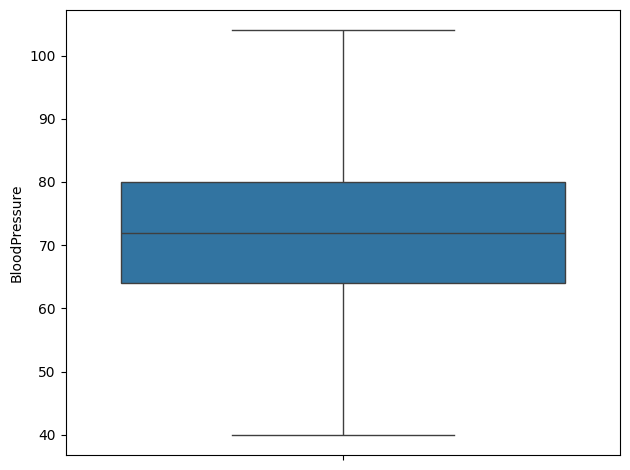

In [215]:
analisis_ric('BloodPressure',df)
print('\n')
print(df[df['BloodPressure']>=107].count())
print(df[df['BloodPressure']<35].count())

df = df[(df['BloodPressure']>38)&(df['BloodPressure']<106)]

sns.boxplot(data=df,y='BloodPressure')
plt.tight_layout()
plt.show()

Rango Intercuratílico: 33.0
Límite superior: 82.5 
Límite inferior: -49.5


Pregnancies                 1
Glucose                     1
BloodPressure               1
SkinThickness               1
Insulin                     1
BMI                         1
DiabetesPedigreeFunction    1
Age                         1
Outcome                     1
dtype: int64
Pregnancies                 190
Glucose                     190
BloodPressure               190
SkinThickness               190
Insulin                     190
BMI                         190
DiabetesPedigreeFunction    190
Age                         190
Outcome                     190
dtype: int64


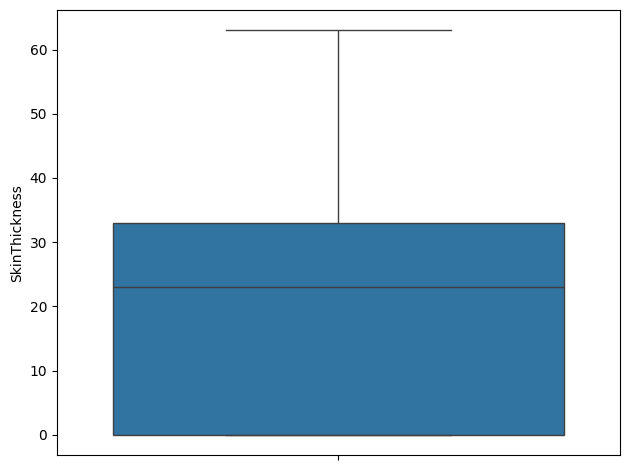

In [216]:
analisis_ric('SkinThickness',df)
print('\n')
print(df[df['SkinThickness']>=82].count())
print(df[df['SkinThickness']<=0].count())

df = df[df['SkinThickness']<82]

sns.boxplot(data=df,y='SkinThickness')
plt.tight_layout()
plt.show()

Se decide eliminar SkinThickness debido a que tiene 190 datos en 0, lo cual sugiere un error en la medicion del dato.

In [217]:
df = df.drop(['SkinThickness'],axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [218]:
analisis_ric('Insulin',df)
print('\n')
print(df[df['Insulin']>=330].count())
print(df[df['Insulin']<=0].count())


Rango Intercuratílico: 132.0
Límite superior: 330.0 
Límite inferior: -198.0


Pregnancies                 28
Glucose                     28
BloodPressure               28
Insulin                     28
BMI                         28
DiabetesPedigreeFunction    28
Age                         28
Outcome                     28
dtype: int64
Pregnancies                 327
Glucose                     327
BloodPressure               327
Insulin                     327
BMI                         327
DiabetesPedigreeFunction    327
Age                         327
Outcome                     327
dtype: int64


Se decide eliminar Insulin debido a que tiene 327 datos en 0, lo cual sugiere un error en la medicion del dato.

In [219]:
df = df.drop(['Insulin'],axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


Rango Intercuratílico: 9.0
Límite superior: 49.9 
Límite inferior: 13.899999999999999


Pregnancies                 9
Glucose                     9
BloodPressure               9
BMI                         9
DiabetesPedigreeFunction    9
Age                         9
Outcome                     9
dtype: int64
Pregnancies                 4
Glucose                     4
BloodPressure               4
BMI                         4
DiabetesPedigreeFunction    4
Age                         4
Outcome                     4
dtype: int64


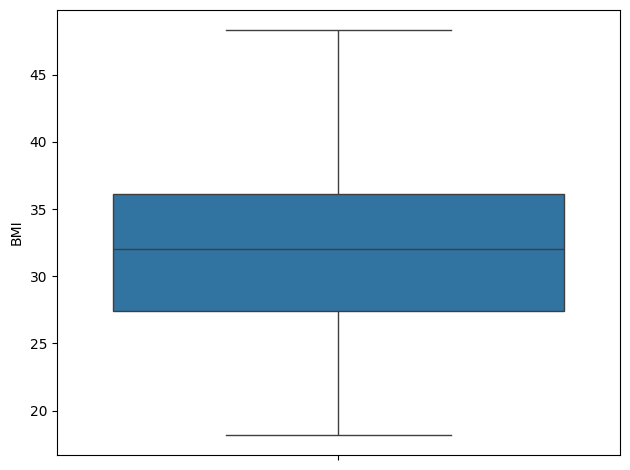

In [220]:
analisis_ric('BMI',df)
print('\n')
print(df[df['BMI']>=49].count())
print(df[df['BMI']<=0].count())

df = df[(df['BMI']>0)&(df['BMI']<=49)]

sns.boxplot(data=df,y='BMI')
plt.tight_layout()
plt.show()

Rango Intercuratílico: 0.38449999999999995
Límite superior: 1.2062499999999998 
Límite inferior: -0.3317499999999999


Pregnancies                 49
Glucose                     49
BloodPressure               49
BMI                         49
DiabetesPedigreeFunction    49
Age                         49
Outcome                     49
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


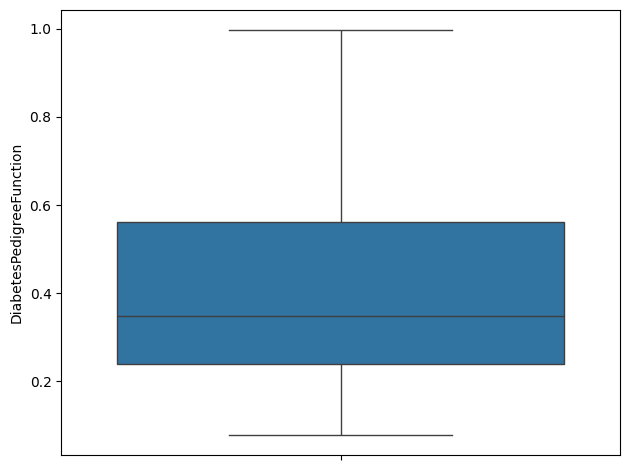

In [221]:
analisis_ric('DiabetesPedigreeFunction',df)
print('\n')
print(df[df['DiabetesPedigreeFunction']>=1].count())
print(df[df['DiabetesPedigreeFunction']<=0].count())

df = df[(df['DiabetesPedigreeFunction']>0)&(df['DiabetesPedigreeFunction']<=1)]

sns.boxplot(data=df,y='DiabetesPedigreeFunction')
plt.tight_layout()
plt.show()


Rango Intercuratílico: 16.0
Límite superior: 64.0 
Límite inferior: 0.0


Pregnancies                 28
Glucose                     28
BloodPressure               28
BMI                         28
DiabetesPedigreeFunction    28
Age                         28
Outcome                     28
dtype: int64


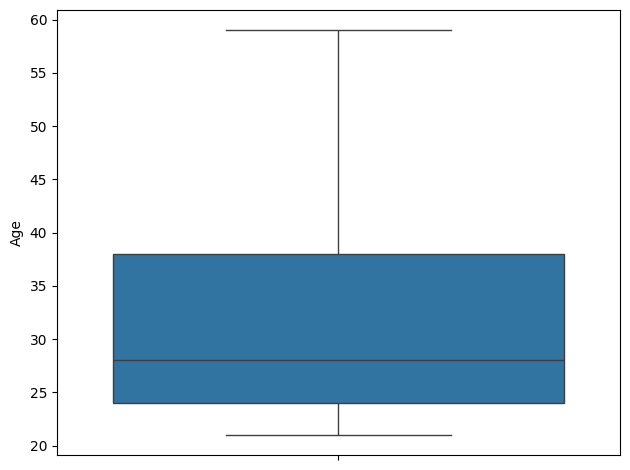

In [222]:
analisis_ric('Age',df)
print('\n')
print(df[df['Age']>=60].count())

df = df[df['Age']<60]

sns.boxplot(data=df,y='Age')
plt.tight_layout()
plt.show()

In [223]:
# DataFrame resultante despues del tratamiento de outliers

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 619 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               619 non-null    int64  
 1   Glucose                   619 non-null    int64  
 2   BloodPressure             619 non-null    int64  
 3   BMI                       619 non-null    float64
 4   DiabetesPedigreeFunction  619 non-null    float64
 5   Age                       619 non-null    int64  
 6   Outcome                   619 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 38.7 KB


In [224]:
# Division conjunto Train y Test

from sklearn.model_selection import train_test_split

X = df.drop('Outcome',axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)



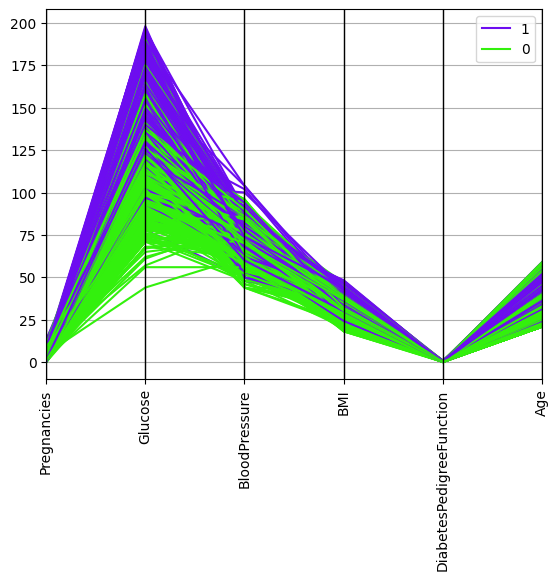

In [225]:
# Visualizacion de la relación de las variables con el objetivo

pd.plotting.parallel_coordinates(df,'Outcome',color=('#6d0df0','#33f00d'))
plt.xticks(rotation=90)
plt.show()

In [226]:
# Se escalan Variables para profundizar analisis

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_esc = scaler.transform(X_train)

X_train_esc = pd.DataFrame(X_train_esc, columns=(X_train.columns), index=(X_train.index))

total_data = X_train_esc
total_data['Outcome'] = y_train

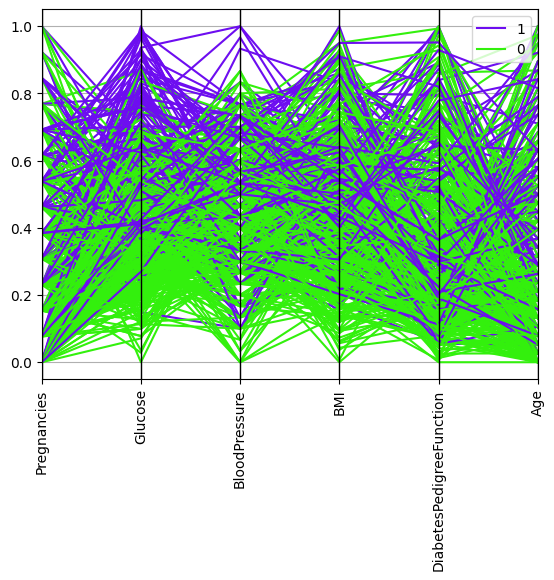

In [227]:
pd.plotting.parallel_coordinates(total_data,'Outcome',color=('#6d0df0','#33f00d'))
plt.xticks(rotation=90)
plt.show()

Analisis: es divisible ya que se logran notar ambos colores en el grafico. No hay un solo color prodominante.

In [228]:
# Modelo y entrenamiento

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

    Nota: No se utilizan las variables escaladas ya que los arboles de decision pueden manejar diferentes escalas.

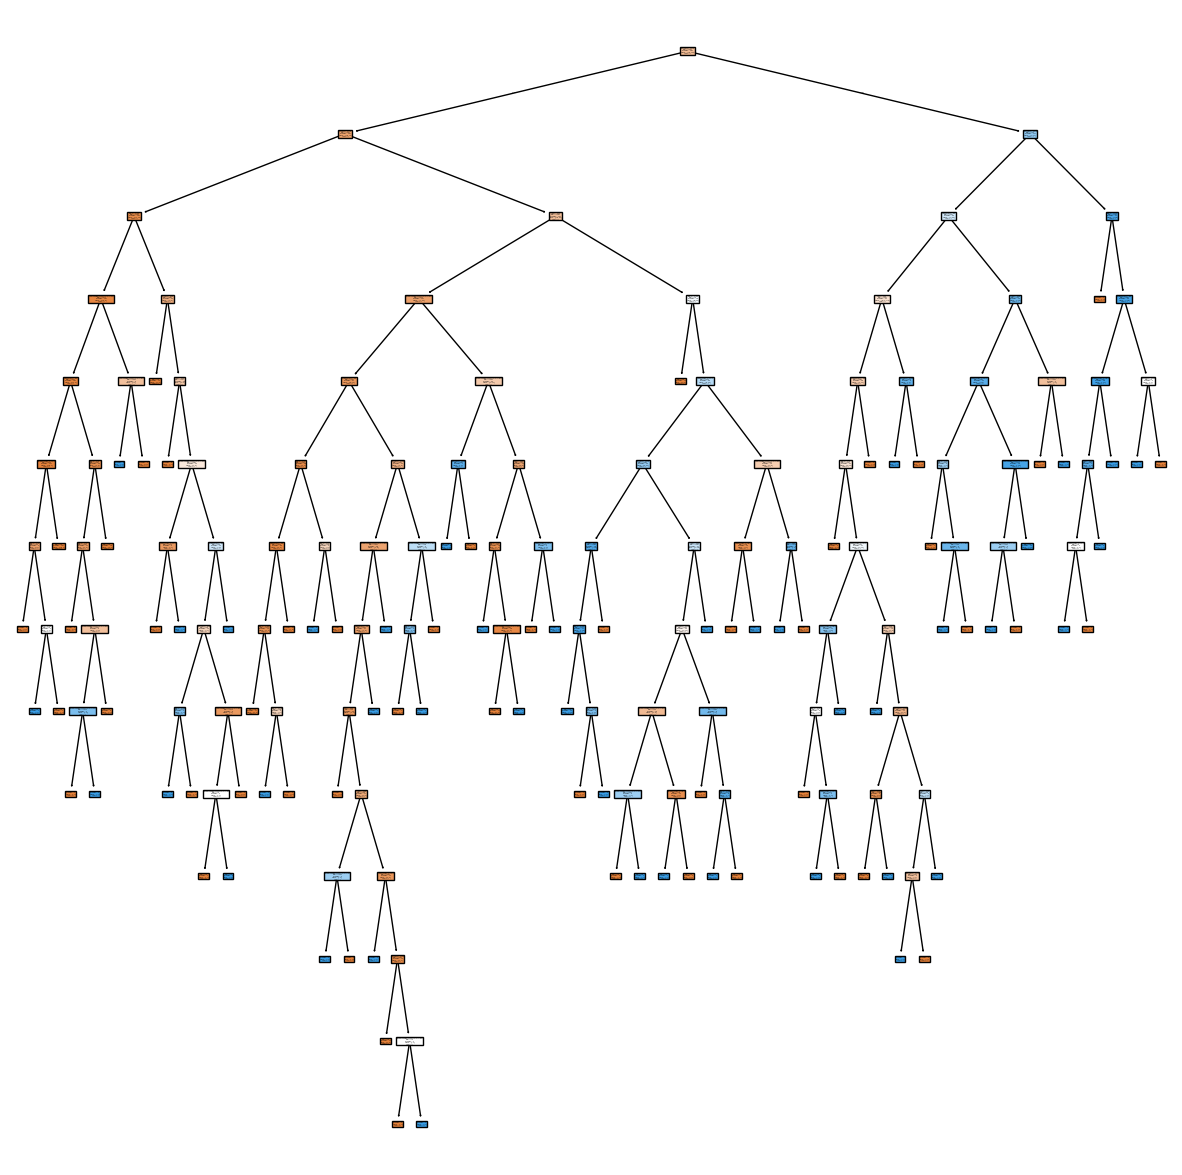

In [229]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [230]:
# Predicciones 

y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1])

In [231]:
# Evaluacion del modelo 

from sklearn.metrics import accuracy_score

print(f'Accuracy Score: {accuracy_score(y_pred,y_test)}')

Accuracy Score: 0.6854838709677419


In [232]:
# Optimizacion por hiperparametros y GridSearch

from sklearn.model_selection import GridSearchCV

tree_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
    'min_samples_split': [3, 4, 5, 6],
    'criterion': ['gini', 'entropy'] 
}

grid_search = GridSearchCV(tree_model, param_grid, n_jobs=2, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

print(f'Mejores parámetros para DecisionTree: {grid_search.best_params_}')

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy}')


Mejores parámetros para DecisionTree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 3}
Accuracy Score: 0.7741935483870968


In [233]:
# Guardado del modelo

from pickle import dump

dump(best_model,open('../models/Desicion_Tree_Classifier_gini_md_5_mss_3_42.sav','wb'))